In [1]:
import mpy
import numpy as np
import matplotlib.pyplot as plt

output_file = "V2L2_helicity_11_11.sp.h5"

In [2]:
# get the data of magnetic field

specData = mpy.SPECOut(output_file)
magneticField = list()
for i in range(2):
    magneticField.append(
        mpy.TorMagneticField.readSPECout(
            specData, 
            lvol = i,
            sResolution = 15,
            thetaResolution = 21, 
            zetaResolution = 21,
        )
    )
for index, mField in enumerate(magneticField):
    mField.writeH5("KTX"+str(index))

In [3]:
# trace field line

lineArr = list()
sArr = np.linspace(-0.8, 0.95, 11)
thetaArr = np.zeros(11)
zetaArr = np.zeros(11)
lineArr.extend(
    mpy.traceLine(bField=magneticField[0], s0=sArr, theta0=thetaArr, zeta0=zetaArr, radius=1.4, niter=150)
)

sArr = np.linspace(-0.8, 0.95, 5)
thetaArr = np.zeros(5)
zetaArr = np.zeros(5)
lineArr.extend(
    mpy.traceLine(bField=magneticField[1], s0=sArr, theta0=thetaArr, zeta0=zetaArr, radius=1.4, niter=150)
)



Begin field-line tracing: 
Progress |####################################################################################################| 100.0% Complete
Begin field-line tracing: 
Progress |####################################################################################################| 100.0% Complete


In [4]:
# write lines

for index, line in enumerate(lineArr):
    line.writeH5("KTXLine_"+str(index))

In [5]:
# read line

# lineArr = list()
# for i in range(15):
#     if i <= 10:
#         lineArr.append(mpy.FieldLine.readH5(lineFile="KTXLine_"+str(i), fieldFile="KTX0"))
#     else:
#         lineArr.append(mpy.FieldLine.readH5(lineFile="KTXLine_"+str(i), fieldFile="KTX1"))

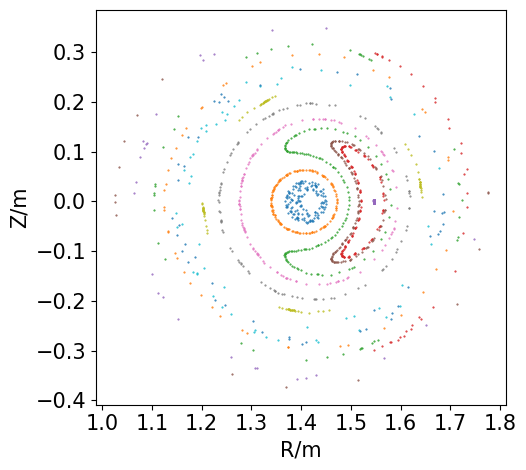

In [6]:
#  plot Poincare

fig, ax = plt.subplots()
poincareArr = list()
for line in lineArr:
    poincare = line.getPoincare()
    poincare.plot(ax=ax)
    poincareArr.append(poincare)
    ax.set_aspect(1)
fig.tight_layout()
